# Теория вероятностей и математическая статистика
## Cеминар 9

### **Задача 1**. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Метод 1. Математические формулы
y = a + b*x или ks = a + b*zp
Коэффициент b = 2.621
Коэффициент a = 444.177

Метод 2. Матричный
Матрица коэффициентов: a = 444.177, b = 2.621

Метод 3. Без учета интерсепта (а = 0)
Коэффициент b = 5.89


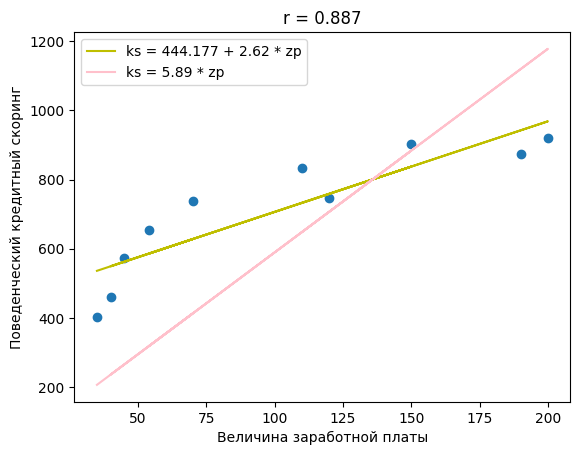

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
cor = np.corrcoef(zp, ks)
print('Метод 1. Математические формулы')
print('y = a + b*x или ks = a + b*zp')
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
print(f'Коэффициент b = {round(b,3)}')
a = np.mean(ks)-b*np.mean(zp)
print(f'Коэффициент a = {round(a,3)}\n')

print('Метод 2. Матричный')
ks = ks.reshape((-1,1))
zp = zp.reshape((-1,1))
zp = np.hstack([np.ones((len(zp),1)),zp])
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print(f'Матрица коэффициентов: a = {round(B[0][0],3)}, b = {round(B[1][0],3)}\n')

print('Метод 3. Без учета интерсепта (а = 0)')
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks = ks.reshape((-1,1))
zp = zp.reshape((-1,1))
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
print(f'Коэффициент b = {round(B[0][0],3)}')

plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.plot(zp, a + b*zp, c ='y', label = 'ks = 444.177 + 2.62 * zp')
plt.plot(zp, B*zp, c ='pink', label = 'ks = 5.89 * zp')
plt.legend()
plt.title(f'r = {round(cor[0][1],3)}')
plt.show()

### **Задача 2**.  Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [155]:
def mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

def derivative_mse(b, x, y):
    return (2/len(x))*np.sum((b*x-y)*x)

print('Метод градиентного спуска без учета интерсепта')
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-06
b = 2.62
print(mse(b, zp, ks))
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha*derivative_mse(b, zp, ks)
    if i % 100 == 0:
        print(f'{i}. b = {b}, mse = {mse(b, zp,ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'{i_min}. b = {b_min}, mse = {mse_min}')
        break
    else:
        mse_min = mse(b, zp, ks)
        i_min = i
        b_min = b
print(f'Минимум был достигнут на итерации {i_min} со значением b = {round(b_min, 3)}')


Метод градиентного спуска без учета интерсепта
203812.48504
0. b = 0.25952808000000005, mse = 493237.7212546963
100. b = 5.54537842245223, mse = 58151.31823171113
200. b = 5.868748638669329, mse = 56522.97550129376
300. b = 5.888531320728348, mse = 56516.88130936019
400. b = 5.8897415574471985, mse = 56516.85850140053
500. b = 5.889815595583751, mse = 56516.858416040064
600. b = 5.889820124983314, mse = 56516.85841572062
628. b = 5.889820285147628, mse = 56516.85841571966
Минимум был достигнут на итерации 628 со значением b = 5.89


### **Задача 3**. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [156]:
def mse(a, b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)


def deriv_mse_a(a, b, x, y):
    return 2*np.sum((a+b*x)-y)/len(x)


def deriv_mse_b(a, b, x, y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)


print('Метод градиентного спуска с учетом интерсепта')
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 5e-05
b = 0.1
a = 0.1
mse_min = mse(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a

for i in range(1000000):
    a -= alpha*deriv_mse_a(a, b, zp, ks)
    b -= alpha*deriv_mse_b(a, b, zp, ks)
    if i % 100000 == 0:
        print(f'{i}. a = {a}, b = {b}, mse = {mse(a, b, zp,ks)}')
    if mse(a, b, zp, ks) > mse_min:
        print(
            f'{i_min}. a = {a_min}, b = {b_min}, mse = {mse_min}')
        break
    else:
        mse_min = mse(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'Минимум был достигнут на итерации {i_min} со значением b = {round(b_min, 3)}, a = {round(a_min, 3)}')


Метод градиентного спуска с учетом интерсепта
0. a = 0.169966, b = 8.07468054476, mse = 122318.06397097567
100000. a = 409.0442373734796, b = 2.879127619051743, mse = 6783.521961452364
200000. a = 441.3974680483413, b = 2.6409995775222037, mse = 6472.374468908443
300000. a = 443.95740007610897, b = 2.622157823932053, mse = 6470.426473787141
400000. a = 444.159953325044, b = 2.6206669802831115, mse = 6470.414278011555
500000. a = 444.1759802422447, b = 2.6205490180788695, mse = 6470.414201657699
520164. a = 444.17653163778414, b = 2.62054495966686, mse = 6470.414201349592
Минимум был достигнут на итерации 520164 со значением b = 2.621, a = 444.177
